In [1]:
!mamba install pandas
!mamba install seaborn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import os
from pathlib import Path

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.8055 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ pandas                        3.0.1                         np22py313h9d9dc1e_0           emscripten-forge              
+ python-tzdata                 2025.3                        pyhd8ed1ab_0                  conda-forge                   
- pip                           25.3                          pyh145f28c_0                  conda-forge                   
mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, seaborn
Channels: emscripten-forge, conda-forge

Solving environment...
Solv

In [17]:
def load_titanic_data():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    try:
        df = pd.read_csv(url)
        print(f"Загружено {len(df)} записей через GitHub")
        return df
    except Exception as e2:
        print(f"Ошибка загрузки через GitHub: {e2}")
        print("Создаем демонстрационные данные...")
    return create_sample_titanic_data()
df = load_titanic_data()
df_clean = df.copy()

Загружено 891 записей через GitHub


In [9]:
print("\n РАЗМЕР ДАННЫХ:")
print(f"   • Количество строк (записей): {df.shape[0]}")
print(f"   • Количество столбцов (признаков): {df.shape[1]}")
print(f"   • Общий размер данных: {df.shape[0] * df.shape[1]} ячеек")
print(f"   • Объем памяти: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\n ИНФОРМАЦИЯ О ДАННЫХ:")
print(df.info())
print("\n3. ТИПЫ ДАННЫХ:")
print(df.dtypes)
print("\n ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Пропущено': missing_data,
    'Процент': missing_percent
})
print(missing_df[missing_df['Пропущено'] > 0])
print("\n ПЕРВЫЕ 5 ЗАПИСЕЙ:")
print(df.head())

print("\n ПОСЛЕДНИЕ 5 ЗАПИСЕЙ:")
print(df.tail())


 РАЗМЕР ДАННЫХ:
   • Количество строк (записей): 891
   • Количество столбцов (признаков): 12
   • Общий размер данных: 10692 ячеек
   • Объем памяти: 189.21 KB

 ИНФОРМАЦИЯ О ДАННЫХ:
<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 66.2 KB
None

3. ТИПЫ ДАННЫХ:
PassengerId      int64
Survived         int64
Pclass

In [11]:
# Выделяем числовые признаки
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nЧисловые признаки: {numeric_columns}")

# Базовые статистики через describe()
print("\n1. БАЗОВЫЕ СТАТИСТИКИ (describe()):")
print(df[numeric_columns].describe())

# Подробный статистический анализ для каждого признака
print("\n2. ПОДРОБНЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ:")

for col in numeric_columns:
    print(f"\n   {col.upper()}:")
    print(f"   • Количество наблюдений (count): {df[col].count()}")
    print(f"   • Среднее значение (mean): {df[col].mean():.4f}")
    print(f"   • Медиана (median): {df[col].median():.4f}")
    print(f"   • Мода (mode): {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")
    print(f"   • Минимальное значение (min): {df[col].min():.4f}")
    print(f"   • Максимальное значение (max): {df[col].max():.4f}")
    print(f"   • Стандартное отклонение (std): {df[col].std():.4f}")
    print(f"   • Дисперсия (variance): {df[col].var():.4f}")
    print(f"   • Размах (range): {df[col].max() - df[col].min():.4f}")
    print(f"   • Межквартильный размах (IQR): {df[col].quantile(0.75) - df[col].quantile(0.25):.4f}")
    print(f"   • Коэффициент вариации (CV): {(df[col].std() / df[col].mean() * 100):.2f}%")

# Квантили и процентили
print("\n3. КВАНТИЛИ И ПРОЦЕНТИЛИ:")
percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
for col in numeric_columns:
    print(f"\n   {col.upper()}:")
    quantiles = df[col].quantile(percentiles)
    for p, q in zip(percentiles, quantiles):
        print(f"   • {p*100:.0f}й процентиль: {q:.4f}")

# Асимметрия и эксцесс
print("\n4. АСИММЕТРИЯ И ЭКСЦЕСС:")
for col in numeric_columns:
    if df[col].count() > 0:
        print(f"\n   {col.upper()}:")
        print(f"   • Асимметрия (skewness): {df[col].skew():.4f}")
        print(f"   • Эксцесс (kurtosis): {df[col].kurtosis():.4f}")


Числовые признаки: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

1. БАЗОВЫЕ СТАТИСТИКИ (describe()):
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000

In [12]:
# Выбросы (метод межквартильного размаха)
print("\n1. ВЫБРОСЫ (метод IQR):")

for col in numeric_columns:
    if df[col].count() > 0:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        print(f"\n   {col.upper()}:")
        print(f"   • Q1 (25%): {Q1:.4f}")
        print(f"   • Q3 (75%): {Q3:.4f}")
        print(f"   • IQR: {IQR:.4f}")
        print(f"   • Нижняя граница: {lower_bound:.4f}")
        print(f"   • Верхняя граница: {upper_bound:.4f}")
        print(f"   • Количество выбросов: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
        if len(outliers) > 0:
            print(f"   • Значения выбросов: {outliers.values[:10]}")

# Анализ дисперсии по группам
print("\n2. АНАЛИЗ ДИСПЕРСИИ ПО ГРУППАМ:")
if 'pclass' in df.columns:
    for col in numeric_columns:
        if col != 'pclass' and df[col].count() > 0:
            print(f"\n   {col.upper()} по классам:")
            grouped_stats = df.groupby('pclass')[col].agg(['mean', 'std', 'var', 'min', 'max'])
            print(grouped_stats.round(2))

# Стандартное отклонение и дисперсия
print("\n3. СРАВНЕНИЕ СТАНДАРТНОГО ОТКЛОНЕНИЯ:")
std_df = pd.DataFrame({
    'Признак': numeric_columns,
    'Среднее': [df[col].mean() for col in numeric_columns],
    'Стд отклонение': [df[col].std() for col in numeric_columns],
    'Коэф. вариации (%)': [(df[col].std() / df[col].mean() * 100) if df[col].mean() != 0 else 0 for col in numeric_columns]
})
print(std_df.round(2))


1. ВЫБРОСЫ (метод IQR):

   PASSENGERID:
   • Q1 (25%): 223.5000
   • Q3 (75%): 668.5000
   • IQR: 445.0000
   • Нижняя граница: -444.0000
   • Верхняя граница: 1336.0000
   • Количество выбросов: 0 (0.00%)

   SURVIVED:
   • Q1 (25%): 0.0000
   • Q3 (75%): 1.0000
   • IQR: 1.0000
   • Нижняя граница: -1.5000
   • Верхняя граница: 2.5000
   • Количество выбросов: 0 (0.00%)

   PCLASS:
   • Q1 (25%): 2.0000
   • Q3 (75%): 3.0000
   • IQR: 1.0000
   • Нижняя граница: 0.5000
   • Верхняя граница: 4.5000
   • Количество выбросов: 0 (0.00%)

   AGE:
   • Q1 (25%): 20.1250
   • Q3 (75%): 38.0000
   • IQR: 17.8750
   • Нижняя граница: -6.6875
   • Верхняя граница: 64.8125
   • Количество выбросов: 11 (1.23%)
   • Значения выбросов: [66.  65.  71.  70.5 65.  65.  71.  80.  70.  70. ]

   SIBSP:
   • Q1 (25%): 0.0000
   • Q3 (75%): 1.0000
   • IQR: 1.0000
   • Нижняя граница: -1.5000
   • Верхняя граница: 2.5000
   • Количество выбросов: 46 (5.16%)
   • Значения выбросов: [3 4 3 3 4 5 3 4 5 3]

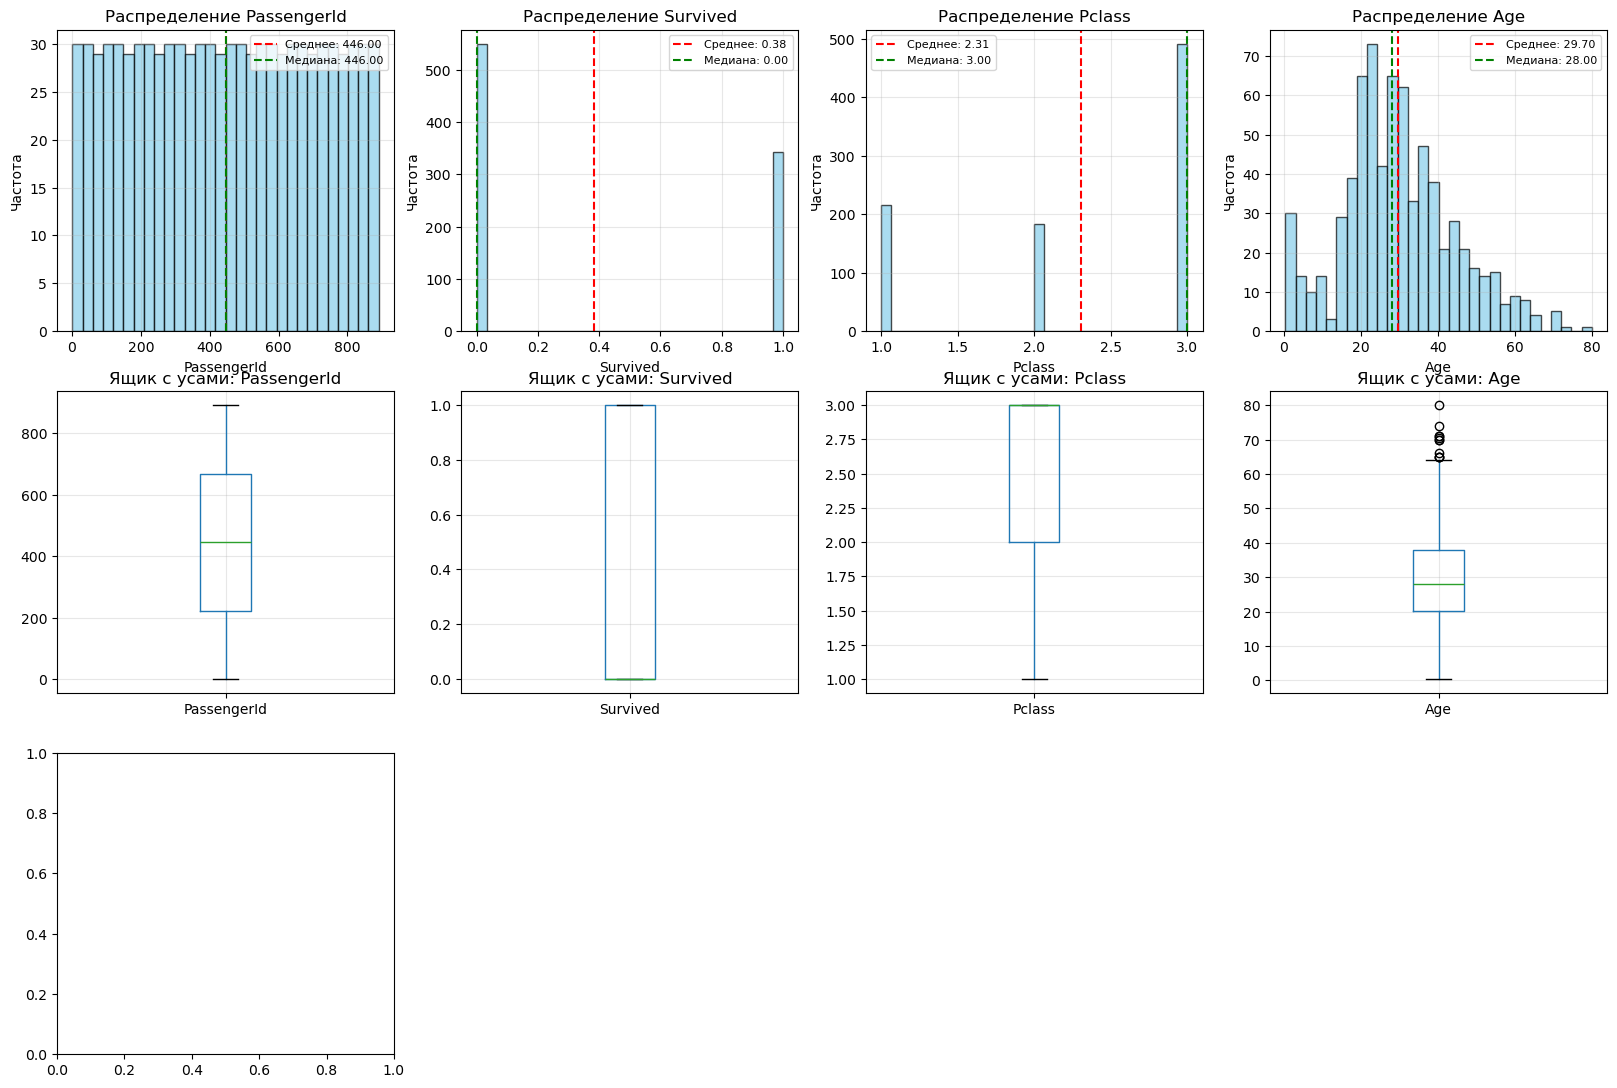

<class 'NameError'>: name 'corr_matrix' is not defined

In [13]:
fig = plt.figure(figsize=(20, 18))

# Гистограммы распределения числовых признаков
for i, col in enumerate(numeric_columns[:4], 1):
    ax = plt.subplot(4, 4, i)
    df[col].hist(bins=30, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')
    ax.set_title(f'Распределение {col}')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label=f'Среднее: {df[col].mean():.2f}')
    ax.axvline(df[col].median(), color='green', linestyle='--', label=f'Медиана: {df[col].median():.2f}')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Ящики с усами (box plots)
for i, col in enumerate(numeric_columns[:4], 5):
    ax = plt.subplot(4, 4, i)
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'Ящик с усами: {col}')
    ax.grid(True, alpha=0.3)

# Тепловая карта корреляций
ax = plt.subplot(4, 4, 9)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, ax=ax)
ax.set_title('Матрица корреляций')

In [14]:
# Матрица корреляций
print("\n1. МАТРИЦА КОРРЕЛЯЦИЙ (Пирсона):")
corr_matrix = df[numeric_columns].corr()
print(corr_matrix.round(3))

# Корреляции с целевой переменной (survived)
if 'survived' in numeric_columns:
    print("\n2. КОРРЕЛЯЦИИ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (survived):")
    survived_corr = corr_matrix['survived'].sort_values(ascending=False)
    for idx, val in survived_corr.items():
        print(f"   • {idx}: {val:.4f}")

# Сильные корреляции
print("\n3. СИЛЬНЫЕ КОРРЕЛЯЦИИ (|r| > 0.3):")
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.3:
            strong_corr.append({
                'Признак 1': corr_matrix.columns[i],
                'Признак 2': corr_matrix.columns[j],
                'Корреляция': corr_matrix.iloc[i, j]
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Корреляция', ascending=False)
    print(strong_corr_df.round(3))
else:
    print("   Сильных корреляций не найдено")


1. МАТРИЦА КОРРЕЛЯЦИЙ (Пирсона):
             PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
PassengerId        1.000    -0.005  -0.035  0.037 -0.058 -0.002  0.013
Survived          -0.005     1.000  -0.338 -0.077 -0.035  0.082  0.257
Pclass            -0.035    -0.338   1.000 -0.369  0.083  0.018 -0.549
Age                0.037    -0.077  -0.369  1.000 -0.308 -0.189  0.096
SibSp             -0.058    -0.035   0.083 -0.308  1.000  0.415  0.160
Parch             -0.002     0.082   0.018 -0.189  0.415  1.000  0.216
Fare               0.013     0.257  -0.549  0.096  0.160  0.216  1.000

3. СИЛЬНЫЕ КОРРЕЛЯЦИИ (|r| > 0.3):
  Признак 1 Признак 2  Корреляция
4     SibSp     Parch       0.415
3       Age     SibSp      -0.308
0  Survived    Pclass      -0.338
1    Pclass       Age      -0.369
2    Pclass      Fare      -0.549


In [22]:
# Поиск дубликатов
print("\n1. ПОИСК ДУБЛИКАТОВ:")
duplicates_before = df_clean.duplicated().sum()
print(f"   Полных дубликатов строк: {duplicates_before}")
# Поиск дубликатов по ключевым колонкам
if 'passenger_id' in df_clean.columns:
    key_duplicates = df_clean.duplicated(subset=['passenger_id']).sum()
    print(f"   Дубликатов по passenger_id: {key_duplicates}")
    
    if key_duplicates > 0:
        print("\n   Примеры дубликатов:")
        duplicate_ids = df_clean[df_clean.duplicated(subset=['passenger_id'], keep=False)]
        print(duplicate_ids.sort_values('passenger_id').head(10))

# Удаление дубликатов
print("\n2. УДАЛЕНИЕ ДУБЛИКАТОВ:")
df_clean = df_clean.drop_duplicates()
print(f"   Удалено дубликатов: {duplicates_before}")
print(f"   Размер после удаления: {df_clean.shape[0]} строк")

# Проверка уникальности passenger_id
if 'passenger_id' in df_clean.columns:
    is_unique = df_clean['passenger_id'].is_unique
    print(f"\n   passenger_id уникален: {is_unique}")




1. ПОИСК ДУБЛИКАТОВ:
   Полных дубликатов строк: 0

2. УДАЛЕНИЕ ДУБЛИКАТОВ:
   Удалено дубликатов: 0
   Размер после удаления: 891 строк
